An example of computing capture and annihilation rate.

#Author: Q.R Liu


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
import charon
from charon import DM
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

Text(0.5,1,u'DM capture rate at the Sun')

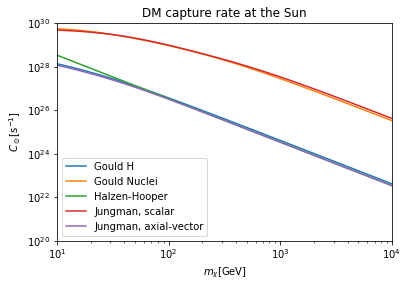

In [3]:
DM_mass = np.logspace(1,4,100) #GeV
DM_cs   = 1.0e-36#*pc.cm**2  #assume WIMP-nuclei cross section 1 pb

#Gould's. ApJ, 388:338-344, 1992.
cap_rate_H = map(lambda dMm : DM.DMSunCaptureRateGould(dMm,DM_cs)[0], DM_mass)
cap_rate_nuclei = map(lambda dMm : np.sum(DM.DMSunCaptureRateGould(dMm,DM_cs)[:]), DM_mass)

#Halzen-Hooper  arXiv : 0910.4513 for >30GeV
cap_rate_HH = map(lambda dMm: DM.DMSunCaptureRateHalzen(dMm,DM_cs),DM_mass)

#Jungman hep-ph/9506380
cap_rate_SI = map(lambda dMm: DM.DMCaptureJungmanSI(dMm,DM_cs,location='Sun'),DM_mass)
cap_rate_SD = map(lambda dMm: DM.DMCaptureJungmanSD(dMm,DM_cs),DM_mass)

plt.plot(DM_mass,cap_rate_H,label = "Gould H")
plt.plot(DM_mass,cap_rate_nuclei,label = "Gould Nuclei")
plt.plot(DM_mass,cap_rate_HH,label = "Halzen-Hooper")
plt.plot(DM_mass,cap_rate_SI,label = "Jungman, scalar")
plt.plot(DM_mass,cap_rate_SD,label = "Jungman, axial-vector")

plt.ylabel(r"$C_\odot [\mathrm{s}^{-1}]$")
plt.xlabel(r"$m_\chi [\mathrm{GeV}]$")
    
plt.ylim(1e20,1e30)
plt.xlim(10,1e4)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("DM capture rate at the Sun")

The annihilation rate is half of the capture rate, or can call functions by replacing "Capture" to "Annihilation".

We can use another model (bs05_agsop, struct_b16_agss09, struct_b16_gs98 for the Sun) or custom input nucleus composition for Gould calculation. Can change the local DM density and velocity.

Text(0.5,1,u'DM annihilation rate at the Sun')

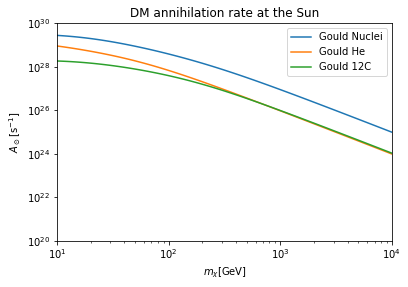

In [4]:
ann_rate_nuclei = map(lambda dMm : np.sum(DM.DMSunAnnihilationRateGould(dMm,DM_cs,model='struct_b16_agss09',
                                          DM_rho=0.39,vel_rot=270.)[:]), DM_mass)

n               = 2
mass_num        = [4.0,12.0] #He, 12C
mass_gr_per_mol = [4.0026,12.0107]
eps             = [0.209,3.87e-3]
ann_rate_nucleus = map(lambda dMm : DM.DMSunAnnihilationRateGould(dMm,DM_cs,n=n,mass_num=mass_num,
                                    mass_gr_per_mol=mass_gr_per_mol,eps=eps,DM_rho=0.39,vel_rot=270.), DM_mass)

ann_rate_He = [ann_rate_nucleus[i][0] for i in range(len(DM_mass))]
ann_rate_C  = [ann_rate_nucleus[i][1] for i in range(len(DM_mass))]

plt.plot(DM_mass,ann_rate_nuclei,label = "Gould Nuclei")
plt.plot(DM_mass,ann_rate_He,label = "Gould He")
plt.plot(DM_mass,ann_rate_C,label = "Gould 12C")

plt.ylabel(r"$A_\odot [\mathrm{s}^{-1}]$")
plt.xlabel(r"$m_\chi [\mathrm{GeV}]$")
    
plt.ylim(1e20,1e30)
plt.xlim(10,1e4)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("DM annihilation rate at the Sun")

Earth capture

Text(0.5,1,u'DM capture rate at the Earth')

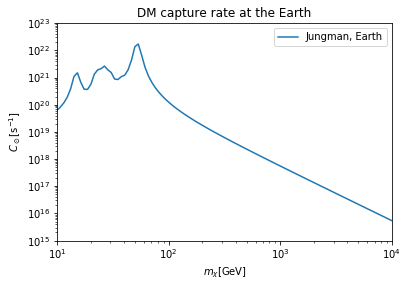

In [5]:
cap_rate_SI_earth = map(lambda dMm: DM.DMCaptureJungmanSI(dMm,DM_cs,location='Earth'),DM_mass)
plt.plot(DM_mass,cap_rate_SI_earth,label = "Jungman, Earth")

plt.ylabel(r"$C_\odot [\mathrm{s}^{-1}]$")
plt.xlabel(r"$m_\chi [\mathrm{GeV}]$")
    
plt.ylim(1e15,1e23)
plt.xlim(10,1e4)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("DM capture rate at the Earth")

================================================================================

End. ヾ(๑╹ꇴ◠๑)ﾉ"